# Hartree-Fock method
## Pauli Principle
## Slater Determinant
## Correlation Exchange Energy
## Mean-Field Approximation
$p\left( x_1 \right) = \int_{-\infty}^{\infty} p\left(x_1 \middle| x_2 \right) p\left(x_2\right) dx_2$

In [13]:
import sympy as sc
from sympy.abc import x,N
from sympy import oo
import matplotlib.pyplot as plt

In [2]:
sc.limit(sc.log(x**(x))/x,x,oo)

oo

In [3]:
sc.limit(sc.log(x)/x,x,100).evalf()

0.0460517018598809

In [4]:
import networkx as nx

In [5]:
g=nx.Graph()
g.add_node(1)
g.add_nodes_from([2,3,4,5])
g.add_edge(1,2,weight=1)
g.add_edge(1,3,weight=1)
g.add_edge(1,4,weight=1)
g.add_edge(2,4,weight=1)
g.add_edge(3,4,weight=1)
g.add_edge(2,3,weight=1)
g.add_edges_from([(1,5),(2,5),(3,5),(4,5)])
g.add_node(6)
g.add_edges_from([(1,6),(2,6),(3,6),(4,6),(5,6)])
g.add_node(7)
g.add_edges_from([(1,7),(2,7),(3,7),(4,7),(5,7),(6,7)])
g.add_node(8)
g.add_edges_from([(1,8),(2,8),(3,8),(4,8),(5,8),(6,8),(7,8)],weight=10)


<IPython.core.display.Javascript object>


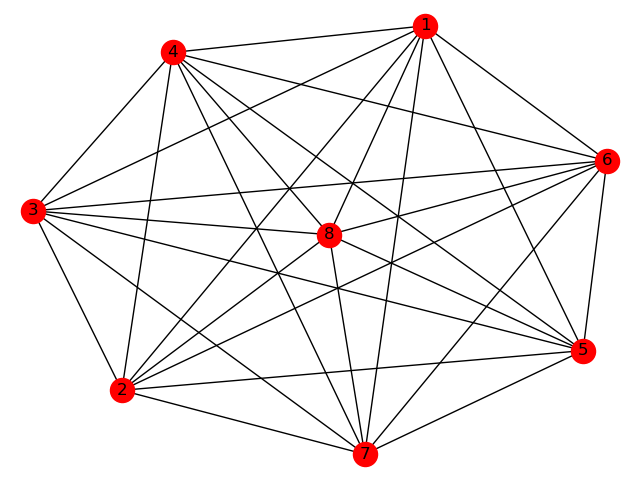

/usr/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [6]:
%matplotlib notebook
nx.draw(g,labels={1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8'})

In [ ]:
g.edges

In [ ]:
import networkx

In [10]:
import math
import numpy as np

def gaussian(x,parameter):
  return (x/parameter)*np.exp(-(x/parameter)**2/2)

N = 40
max_iterations = 1000
dr = 0.2 # grid spacing
hbar = 41.437
initial_parameter = 1.4
damping = 0.0001

# HF Potential parameters
a = -1090.0
b = 17488.0

grid = np.array([i*dr for i in range(N)])

# init wf with gaussian * r (so that we don't have to care about the 1/r^2 term in the spherical laplacian; YOLO)
wavefunction = np.array([gaussian(r,initial_parameter) for r in grid])

for i in range(max_iterations):  
  wavefunction /= np.sqrt(dr*sum(wavefunction**2))
  
  # define density with a new, "virtual" wf (wf / grid) that is also normalised (for reasons yet unknown)
  density = np.array([0] + [4 * (wavefunction[j]/grid[j])**2 / (4*np.pi) for j in range(1,N)])
  
  potential = (3*a/4)*density + 3*b*density**2/16

  # calculate laplacian on the wave function with three-point approach, treating the edges with two-point
  kinetic = np.empty(N)
  kinetic[0] = hbar*wavefunction[0]/(dr**2)
  kinetic[N-1] = -(hbar/(2*dr**2))*(wavefunction[N-2]-wavefunction[N-1])
  for j in range(1,N-1):
    kinetic[j] = -(hbar/(2*dr**2))*(wavefunction[j-1]-2*wavefunction[j]+ wavefunction[j+1])
  
  transformed = kinetic + potential*wavefunction
  energy = dr * sum(transformed*wavefunction)
  wavefunction -= damping * (transformed - energy * wavefunction)
  

# compare original fortran values with ours
test = sum(np.array([0.0, 0.16082111, 0.318332911, 0.46795094, 0.602513671, 0.711465359, 0.78208679, 0.804534018, 0.778795719, 0.716483831, 0.634517372, 0.54747957, 0.464517713, 0.390013307, 0.325332254, 0.270266443, 0.22391808, 0.185168654, 0.152902335, 0.12610051, 0.103872754, 0.0854586437, 0.070216991, 0.0576112382, 0.0471942723, 0.0385944098, 0.0315031111, 0.0256644022, 0.0208660848, 0.0169323254, 0.0137175629, 0.0111015057, 0.00898501649, 0.00728676701, 0.00594055373, 0.0048931092, 0.00410239166, 0.00353624555, 0.00317138853, 0.00299268612])-wavefunction)
print(abs(test))

3.211106989961521e-07


<IPython.core.display.Javascript object>


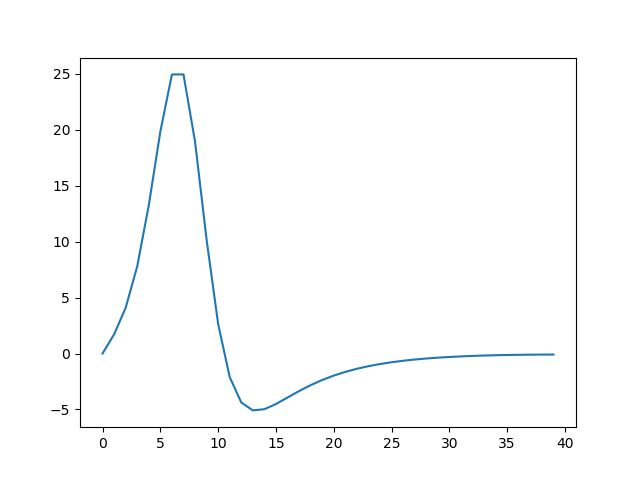

In [16]:
%matplotlib notebook
plt.plot(kinetic)